# Project: Wrangling and Analyze Data

## Data Gathering



In [171]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import json
import re
import time

In [2]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
df.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.status_code

200

In [4]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [5]:
r.encoding

'utf-8'

In [18]:
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(r.content)
    
#creating dataframe out of tsv file

image_df = pd.read_csv('image-predictions.tsv',sep='\t')
image_df.set_index('tweet_id')


,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
consumer_key = '*****'
consumer_secret = '*******'
access_token = '****'
access_secret = '****'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [14]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [10]:
#https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy

df_list = []

with open('tweet-json.txt', 'r',encoding='utf-8-sig',errors='ignore') as file:

    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweeted = tweet['retweet_count']
        favorited = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        date_time = tweet['created_at']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweeted,
                        'favorite_count': favorited,
                        'user_count': user_count,
                        'date_time': pd.to_datetime(date_time)})
api_df = pd.DataFrame(df_list)
api_df.sample(10)

,date_time,favorite_count,retweet_count,tweet_id,user_count
1086,2016-06-01 02:00:04,5757,2006,737826014890496000,3200943
135,2017-05-21 16:48:45,54720,15546,866334964761202691,3200891
1758,2015-12-20 22:46:44,6082,2753,678708137298427904,3200953
1825,2015-12-14 15:57:56,1526,385,676430933382295552,3201002
66,2017-06-26 16:31:08,17099,3261,879376492567855104,3200891
1726,2015-12-24 03:55:21,2365,749,679872969355714560,3200953
961,2016-07-06 15:54:42,14621,5747,750719632563142656,3200943
2079,2015-11-29 04:32:51,647,105,670822709593571328,3201008
245,2017-03-25 16:45:08,27154,5365,845677943972139009,3200891
625,2016-11-06 01:33:58,18139,6288,795076730285391872,3200900


## Assessing Data

First step of the data wrangling process is to visually assesing the data. In order to do so, I will expand the 'twitter-archive-enhanced-2.csv' file.




In [17]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [120]:
df.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [121]:
df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Bailey         7
Toby           7
Buddy          7
Daisy          7
Dave           6
Koda           6
Scout          6
Rusty          6
Leo            6
Bella          6
Milo           6
Jax            6
Oscar          6
Stanley        6
Jack           6
Bentley        5
            ... 
Doobert        1
Dook           1
Gustaf         1
Jay            1
Pluto          1
Shawwn         1
Gin            1
Arya           1
Buddah         1
Grizzie        1
Obie           1
Craig          1
Diogi          1
Apollo         1
Crouton        1
Mack           1
Mimosa         1
Binky          1
Willy          1
Anna           1
Sprinkles      1
Tripp          1
Amber          1
Bronte         1
Kendall        1
Oreo           1
Ace            1
Dudley        

In [39]:
# explore data with name a
df.loc[df['name'] =='a']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [40]:
# explore data with name an
df.loc[df['name'] =='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [25]:
#Visual assessment for image_prediction.tsv file
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [26]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_df.shape

(2075, 12)

In [11]:
image_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [12]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [14]:
image_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [15]:
image_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
miniature_pinscher                 20
toy_terrier                        20
chow                               20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [16]:
image_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [11]:
api_df

,date_time,favorite_count,retweet_count,tweet_id,user_count
0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889
1,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889
2,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889
3,2017-07-30 15:58:51,42908,8964,891689557279858688,3200889
4,2017-07-29 16:00:24,41048,9774,891327558926688256,3200889
5,2017-07-29 00:08:17,20562,3261,891087950875897856,3200889
6,2017-07-28 16:27:12,12041,2158,890971913173991426,3200889
7,2017-07-28 00:22:40,56848,16716,890729181411237888,3200889
8,2017-07-27 16:25:51,28226,4429,890609185150312448,3200889
9,2017-07-26 15:59:51,32467,7711,890240255349198849,3200889


In [12]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
date_time         2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 92.0 KB


In [13]:
api_df.shape

(2354, 5)

In [15]:
api_df.describe()

,favorite_count,retweet_count,tweet_id,user_count
count,2354.000000,2354.000000,2.354000e+03,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17,3.200942e+06
std,11814.771334,5284.770364,6.852812e+16,4.457302e+01
min,0.000000,0.000000,6.660209e+17,3.200799e+06
25%,1415.000000,624.500000,6.783975e+17,3.200898e+06
50%,3603.500000,1473.500000,7.194596e+17,3.200945e+06
75%,10122.250000,3652.000000,7.993058e+17,3.200953e+06
max,132810.000000,79515.000000,8.924206e+17,3.201018e+06


### Quality issues

1.Removing duplicate images inside the image_df dataframe.

2.Merging columns for dogs under stage and cleaning up the cells from None and NaN 

3.Tweet info and image info can be merged and displayed together

4.Renaming some columns in the merged  twttr_clean_final dataframe for clarity

5.Tweet_ids being integers

6.Missing Data: replace faulty names or corrected names

7.Converting the timestamp column from a string to DateTime objects

8.Remove unwanted columns from the twttr_clean_final dataset and rearange columns for an easier read

### Tidiness issues
1. Dog types can be re-arranged under dog_kind column

2. tweet info and image info can be joined together

## Cleaning Data
In this section, data will be cleaned **all** of the issues documented while assessing. 


In [122]:
# Make copies of original pieces of data
df_clean = df.copy()

In [19]:
image_clean = image_df.copy()

In [20]:
tweet_clean = api_df.copy()

### Issue #1:

#### Define: Removing the duplicate images in the image_df dataframe

#### Code

In [26]:
image_clean.jpg_url.duplicated().sum()

66

In [31]:
image_clean.jpg_url.drop_duplicates(inplace=True)

#### Test

In [30]:
image_clean.jpg_url.duplicated().sum()

0

### Issue #2:

#### Define: Dog types can be rearranged under the stage column

#### Code

In [123]:
#converting NaN and None cells to empty cells for each column before concatinating them
df_clean.doggo.replace('None', '', inplace=True)
df_clean.doggo.replace(np.NaN, '', inplace=True)

In [124]:
df_clean.floofer.replace('None', '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)

In [125]:
df_clean.pupper.replace('None', '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)

In [126]:
df_clean.puppo.replace('None', '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)

In [127]:
#Concatinating columns under the stage column
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [128]:
df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


#### Test

In [129]:
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
680,788908386943430656,NaN,NaN,2016-10-20 01:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Lucy. She destroyed not one, but two r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/788908386...,11,10,Lucy,,,,,
592,798933969379225600,NaN,NaN,2016-11-16 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iroh. He's in a predicament. 12/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798933969...,12,10,Iroh,,,,,
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,,,,,
1373,701981390485725185,NaN,NaN,2016-02-23 04:06:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiji. She's a Powdered Stegafloof. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701981390...,12,10,Fiji,,,,,
2223,668297328638447616,NaN,NaN,2015-11-22 05:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",2 rare dogs. They waddle (v inefficient). Some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668297328...,9,10,None,,,,,
1772,678278586130948096,NaN,NaN,2015-12-19 18:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,10,10,None,,,pupper,,pupper
1301,707629649552134146,NaN,NaN,2016-03-09 18:10:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate marshmallows but this on...,NaN,NaN,NaN,https://vine.co/v/iHhBOTl5p9z,10,10,None,,,,,
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,,,,,
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,,,,,
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,,,,,


### Issue #3:

#### Define : tweet info and image info can be joined together

#### Code

In [130]:
# merge tweet_clean and df_clean
twttr_clean = pd.merge(tweet_clean, df_clean ,on='tweet_id')
twttr_clean.set_index('tweet_id')
twttr_clean.head(3)

,date_time,favorite_count,retweet_count,tweet_id,user_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,...,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,


#### Test

In [131]:
twttr_clean.columns

Index(['date_time', 'favorite_count', 'retweet_count', 'tweet_id',
       'user_count', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'stage'],
      dtype='object')

In [132]:
# merge twttr_clean and image_clean
twttr_clean_final = pd.merge(twttr_clean, image_clean ,on='tweet_id')
twttr_clean_final.set_index('tweet_id')
twttr_clean_final.head(3)

,date_time,favorite_count,retweet_count,tweet_id,user_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [133]:
twttr_clean_final.columns

Index(['date_time', 'favorite_count', 'retweet_count', 'tweet_id',
       'user_count', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'stage', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #4:

### Define: Renaming some columns in the merged  twttr_clean_final dataframe for clarity

### Code:

In [60]:
twttr_clean_final.columns

Index(['date_time', 'favorite_count', 'retweet_count', 'tweet_id',
       'user_count', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'stage', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [151]:
twttr_clean_final.rename(columns={"p1": "First_Prediction", 'p1_conf': "Confidence_%_of_1st_Prediction", 'p1_dog': "True_or_False",
                               'p2':"Second_Prediction", 'p2_conf':"Confidence_%_of_2nd_Prediction", 'p2_dog':"True_or_False",
                               'p3':"Third_Prediction", 'p3_conf':"Confidence_%_of_3rd_Prediction", 'p3_dog':"True_or_False"},inplace=True)


### Test:

In [152]:
twttr_clean_final.columns

Index(['date_time', 'favorite_count', 'retweet_count', 'tweet_id',
       'user_count', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'stage', 'jpg_url', 'img_num',
       'First_Prediction', 'Confidence_%_of_1st_Prediction', 'True_or_False',
       'Second_Prediction', 'Confidence_%_of_2nd_Prediction', 'True_or_False',
       'Third_Prediction', 'Confidence_%_of_3rd_Prediction', 'True_or_False'],
      dtype='object')

### Issue #5:

### Define: Tweet_ids being integers. Will convert them to string

### Code:

In [153]:
# Converting the tweet_id to string.
twttr_clean_final.tweet_id = twttr_clean_final.tweet_id.astype(str)

### Test:

In [154]:
twttr_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
date_time                         2073 non-null datetime64[ns]
favorite_count                    2073 non-null int64
retweet_count                     2073 non-null int64
tweet_id                          2073 non-null object
user_count                        2073 non-null int64
in_reply_to_status_id             23 non-null float64
in_reply_to_user_id               23 non-null float64
timestamp                         2073 non-null object
source                            2073 non-null object
text                              2073 non-null object
retweeted_status_id               79 non-null float64
retweeted_status_user_id          79 non-null float64
retweeted_status_timestamp        79 non-null object
expanded_urls                     2073 non-null object
rating_numerator                  2073 non-null int64
rating_denominator                2073 non-null int64
name            

### Issue #6:

### Define: Missing Data: replace faulty names with and empty string

### Code:

In [155]:
twttr_clean_final

,date_time,favorite_count,retweet_count,tweet_id,user_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,...,img_num,First_Prediction,Confidence_%_of_1st_Prediction,True_or_False,Second_Prediction,Confidence_%_of_2nd_Prediction,True_or_False,Third_Prediction,Confidence_%_of_3rd_Prediction,True_or_False
0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51,42908,8964,891689557279858688,3200889,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24,41048,9774,891327558926688256,3200889,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,2017-07-29 00:08:17,20562,3261,891087950875897856,3200889,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,2017-07-28 16:27:12,12041,2158,890971913173991426,3200889,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,2017-07-28 00:22:40,56848,16716,890729181411237888,3200889,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,2017-07-27 16:25:51,28226,4429,890609185150312448,3200889,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,2017-07-26 15:59:51,32467,7711,890240255349198849,3200889,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [136]:
# replacing faulty names with ""
twttr_clean_final['name'].replace(['a'],' ', inplace=True)

In [138]:
twttr_clean_final['name'].replace({'the': " "},inplace=True)

In [139]:
twttr_clean_final['name'].replace("an","", inplace=True)

In [141]:
twttr_clean_final['name'].replace("None"," ", inplace=True)

In [143]:
twttr_clean_final['name'].replace("light",'', inplace=True)
twttr_clean_final['name'].replace("life",' ', inplace=True)
twttr_clean_final['name'].replace("by",'', inplace=True)
twttr_clean_final['name'].replace("actually",'', inplace=True)
twttr_clean_final['name'].replace("just",'', inplace=True)
twttr_clean_final['name'].replace("getting",'', inplace=True) 
twttr_clean_final['name'].replace("infuriating",'', inplace=True) 
twttr_clean_final['name'].replace("old",' ', inplace=True) 
twttr_clean_final['name'].replace("all",' ', inplace=True) 
twttr_clean_final['name'].replace("this",' ', inplace=True) 
twttr_clean_final['name'].replace("very",' ', inplace=True) 
twttr_clean_final['name'].replace("mad",' ', inplace=True) 
twttr_clean_final['name'].replace("not",' ', inplace=True)
twttr_clean_final['name'].replace("one",' ', inplace=True)
twttr_clean_final['name'].replace("my",' ', inplace=True)
twttr_clean_final['name'].replace("O"," ", inplace=True)
twttr_clean_final['name'].replace("quite"," ", inplace=True)
twttr_clean_final['name'].replace("such"," ", inplace=True)


### Test:

In [144]:
twttr_clean_final.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5               
6            Jax
7               
8           Zoey
9         Cassie
10          Koda
11         Bruno
12              
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21              
22        Canela
23              
24              
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
2043            
2044            
2045            
2046            
2047            
2048            
2049            
2050            
2051            
2052            
2053            
2054            
2055            
2056            
2057            
2058            
2059            
2060            
2061            
2062            
2063            
2064            
2065            
2066            
2067            
2068            
2069            
2070          

In [147]:
twttr_clean_final.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', ' ', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', '

### Issue #7:


### Define: Converting the timestamp column from a string to DateTime objects

### Code:

In [156]:
twttr_clean_final['timestamp'] = pd.to_datetime(twttr_clean_final['timestamp'])

#Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns 
#called Hour, Day, Month, and Year. You will create these columns based off of the timeStamp column, 

twttr_clean_final['date'] = twttr_clean_final['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twttr_clean_final['time'] = twttr_clean_final['timestamp'].apply(lambda time: time.strftime('%H:%M'))

### Test:

In [157]:
twttr_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 35 columns):
date_time                         2073 non-null datetime64[ns]
favorite_count                    2073 non-null int64
retweet_count                     2073 non-null int64
tweet_id                          2073 non-null object
user_count                        2073 non-null int64
in_reply_to_status_id             23 non-null float64
in_reply_to_user_id               23 non-null float64
timestamp                         2073 non-null datetime64[ns]
source                            2073 non-null object
text                              2073 non-null object
retweeted_status_id               79 non-null float64
retweeted_status_user_id          79 non-null float64
retweeted_status_timestamp        79 non-null object
expanded_urls                     2073 non-null object
rating_numerator                  2073 non-null int64
rating_denominator                2073 non-null int64
name    

### Issue #8:

### Define: Remove unwanted columns from the twttr_clean_final dataset and rearange columns for an easier read

### Code:

In [158]:
twttr_clean_final.drop([
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

### Test:

In [159]:
twttr_clean_final.columns

Index(['date_time', 'favorite_count', 'retweet_count', 'tweet_id',
       'user_count', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'stage', 'jpg_url', 'img_num', 'First_Prediction',
       'Confidence_%_of_1st_Prediction', 'True_or_False', 'Second_Prediction',
       'Confidence_%_of_2nd_Prediction', 'True_or_False', 'Third_Prediction',
       'Confidence_%_of_3rd_Prediction', 'True_or_False', 'date', 'time'],
      dtype='object')

## Storing Data


In [160]:
# Save clean DataFrame to csv file
twttr_clean_final.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data


In [161]:
df_latest = pd.read_csv('twitter_archive_master.csv')

In [162]:
df_latest.head(10)

,Unnamed: 0,date_time,favorite_count,retweet_count,tweet_id,user_count,timestamp,rating_numerator,rating_denominator,name,...,Confidence_%_of_1st_Prediction,True_or_False,Second_Prediction,Confidence_%_of_2nd_Prediction,True_or_False.1,Third_Prediction,Confidence_%_of_3rd_Prediction,True_or_False.2,date,time
0,0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,2017-08-01 16:23:56,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,08-01-2017,16:23
1,1,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,2017-08-01 00:17:27,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,08-01-2017,00:17
2,2,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889,2017-07-31 00:18:03,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,07-31-2017,00:18
3,3,2017-07-30 15:58:51,42908,8964,891689557279858688,3200889,2017-07-30 15:58:51,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,07-30-2017,15:58
4,4,2017-07-29 16:00:24,41048,9774,891327558926688256,3200889,2017-07-29 16:00:24,12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,07-29-2017,16:00
5,5,2017-07-29 00:08:17,20562,3261,891087950875897856,3200889,2017-07-29 00:08:17,13,10,,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,07-29-2017,00:08
6,6,2017-07-28 16:27:12,12041,2158,890971913173991426,3200889,2017-07-28 16:27:12,13,10,Jax,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,07-28-2017,16:27
7,7,2017-07-28 00:22:40,56848,16716,890729181411237888,3200889,2017-07-28 00:22:40,13,10,,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,07-28-2017,00:22
8,8,2017-07-27 16:25:51,28226,4429,890609185150312448,3200889,2017-07-27 16:25:51,13,10,Zoey,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,07-27-2017,16:25
9,9,2017-07-26 15:59:51,32467,7711,890240255349198849,3200889,2017-07-26 15:59:51,14,10,Cassie,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,07-26-2017,15:59


In [163]:
df_latest.columns

Index(['Unnamed: 0', 'date_time', 'favorite_count', 'retweet_count',
       'tweet_id', 'user_count', 'timestamp', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num',
       'First_Prediction', 'Confidence_%_of_1st_Prediction', 'True_or_False',
       'Second_Prediction', 'Confidence_%_of_2nd_Prediction',
       'True_or_False.1', 'Third_Prediction', 'Confidence_%_of_3rd_Prediction',
       'True_or_False.2', 'date', 'time'],
      dtype='object')

### Insights:

1. **Favorited vs ReTweeted tweets :** There is a linear positive correlation between the retweet and favorite counts. (Please also see the visualization regarding it)

In [164]:
df_latest.corr()

,Unnamed: 0,favorite_count,retweet_count,tweet_id,user_count,rating_numerator,rating_denominator,img_num,Confidence_%_of_1st_Prediction,True_or_False,Confidence_%_of_2nd_Prediction,True_or_False.1,Confidence_%_of_3rd_Prediction,True_or_False.2
Unnamed: 0,1.000000,-0.561877,-0.392125,-0.959248,0.940315,-0.030225,0.007333,-0.221693,-0.101939,-0.122126,-0.000112,-0.120629,0.046027,-0.098345
favorite_count,-0.561877,1.000000,0.790476,0.607007,-0.503319,0.010157,-0.026395,0.132241,0.076077,0.056156,-0.022787,0.060114,-0.053427,0.043928
retweet_count,-0.392125,0.790476,1.000000,0.404702,-0.366378,0.012787,-0.022173,0.105534,0.044739,0.006092,-0.008619,0.017197,-0.035511,0.006140
tweet_id,-0.959248,0.607007,0.404702,1.000000,-0.869193,0.023103,-0.024530,0.205455,0.101283,0.111304,0.003047,0.112607,-0.042979,0.087844
user_count,0.940315,-0.503319,-0.366378,-0.869193,1.000000,-0.020781,0.005238,-0.209110,-0.078769,-0.119247,-0.013615,-0.118816,0.029591,-0.096398
rating_numerator,-0.030225,0.010157,0.012787,0.023103,-0.020781,1.000000,0.198241,-0.000405,-0.009143,-0.028515,-0.020317,-0.033740,-0.003887,-0.028497
rating_denominator,0.007333,-0.026395,-0.022173,-0.024530,0.005238,0.198241,1.000000,-0.004066,-0.004325,0.000980,-0.034461,-0.000518,0.006801,0.004997
img_num,-0.221693,0.132241,0.105534,0.205455,-0.209110,-0.000405,-0.004066,1.000000,0.203071,0.026060,-0.159690,0.045653,-0.139454,0.059565
Confidence_%_of_1st_Prediction,-0.101939,0.076077,0.044739,0.101283,-0.078769,-0.009143,-0.004325,0.203071,1.000000,0.118777,-0.511547,0.131969,-0.709583,0.109022
True_or_False,-0.122126,0.056156,0.006092,0.111304,-0.119247,-0.028515,0.000980,0.026060,0.118777,1.000000,0.112147,0.634661,0.048809,0.555778



2. **Distribution of the tweets by week days :**  As it can be seen from the below table and the graph there is not a very meaningful changes on the tweets. I guess the only meaningful conclusion we can reach is that there are less tweets on the weekends

In [165]:
#We have to copy df to another file
df_time = df_latest.copy()


df_time = df_time[['timestamp']]

df_time['timestamp'] = pd.to_datetime(df_time['timestamp'])

df_time['week_day'] = df_time['timestamp'].dt.day_name()

#df_time

df_time_mean = df_time['week_day'].value_counts() #calculating the mean for the ratings


# # Setting strings as index (preparing to the plot).
df_time_mean.index = (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


df_time_mean.index.name='Week Day'
df_time_mean.column ='Tweets Number'


df_time_mean

Week Day
Monday       339
Tuesday      313
Wednesday    311
Thursday     295
Friday       291
Saturday     262
Sunday       262
Name: week_day, dtype: int64

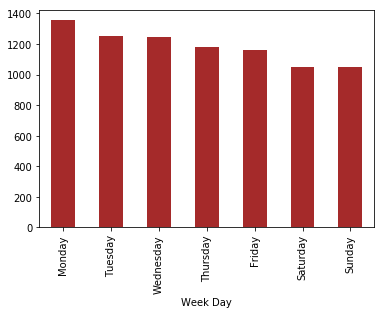

In [212]:
# Plotting Average Rating over the weekdays.
df_time_mean.plot.bar(y = 'Tweet Numbers', color= 'brown');

In [190]:
# from dateutil.parser import parse

# df_time_mean['weekday'] = df_time['timestamp'].apply(lambda x: parse(str(x)).strftime("%A"))


3. **Which dog breed gets the most attention :** Golden retriever by far the most favourited dog breed.     

In [167]:
df_breed = df_latest.copy()


favs_by_breed = df_breed.groupby(['First_Prediction'])['favorite_count'].sum().sort_values(ascending = False)
favs_by_breed

most_favourited = favs_by_breed.head(10)

most_favourited



First_Prediction
golden_retriever      1696627
Labrador_retriever    1123850
Pembroke               994755
Chihuahua              676441
Samoyed                542991
French_bulldog         465738
chow                   404241
pug                    320223
cocker_spaniel         315825
Pomeranian             299114
Name: favorite_count, dtype: int64

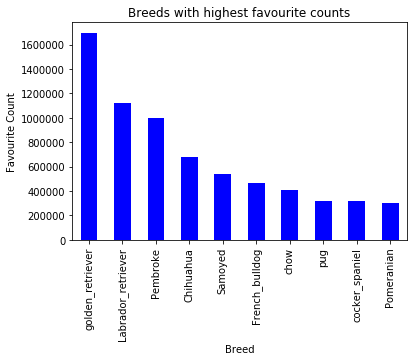

In [172]:
# setup the bar chart
most_favourited.plot(kind = 'bar', color = 'blue')
plt.title('Breeds with highest favourite counts')
plt.xlabel('Breed')
plt.ylabel('Favourite Count');

### Visualization

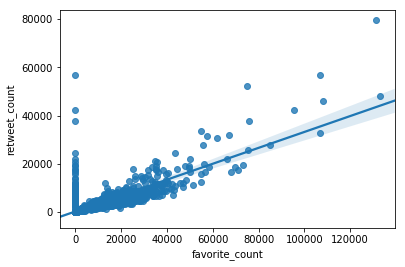

In [173]:
import seaborn as sb 
import matplotlib.pyplot as plt

sb.regplot(x = 'favorite_count', y = 'retweet_count', data= df_latest)


plt.show()


There is a positive correlation between the favorited and retweeted tweets as per the scatterplot.